In [1]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('Resources/highschool.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))

            LNS14027660
DATE                   
2000-01-01          3.4
2000-02-01          3.4
2000-03-01          3.3
2000-04-01          3.3
2000-05-01          3.4
2000-06-01          3.4
2000-07-01          3.4
2000-08-01          3.7
2000-09-01          3.5
2000-10-01          3.6
2000-11-01          3.5
2000-12-01          3.5
2001-01-01          3.8
2001-02-01          3.7
2001-03-01          3.8
2001-04-01          3.7
2001-05-01          3.9
2001-06-01          3.8
2001-07-01          4.1
2001-08-01          4.4


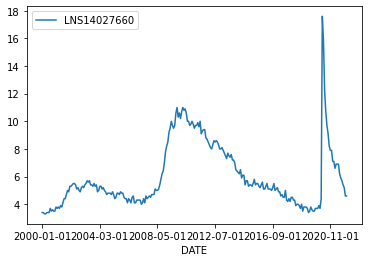

In [2]:
# line plot of dataset
series.plot()
pyplot.show()

## Split the Dataset

In [3]:
# split the dataset
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 258, Validation 7


In [4]:
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

## Develop the Model

In [5]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [6]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [8]:
# load dataset
series1 = read_csv('dataset.csv', header=0)
# seasonal difference
X = series1.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  246
Model:                 ARIMA(7, 0, 1)   Log Likelihood                -397.874
Date:                Thu, 10 Mar 2022   AIC                            815.749
Time:                        20:22:17   BIC                            850.802
Sample:                             0   HQIC                           829.863
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0631      0.869      0.073      0.942      -1.640       1.766
ar.L1          1.6682      0.378      4.409      0.000       0.927       2.410
ar.L2         -0.9346      0.412     -2.267      0.0

## One-Step-Out-of-Sample Forecast

### Forecast Function

In [9]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [10]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, months_in_year)

In [11]:
print('Forecast: %f' % forecast)

Forecast: 4.274351


### Predict Function

In [12]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [13]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, months_in_year)
print('Forecast: %f' % forecast)

Forecast: 4.274351


## Multi-Step Out-of-Sample Forecast

### Forecast Function

In [14]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]

In [16]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)
# invert the differenced forecast to something usable
history = [x for x in X]
month = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, months_in_year)
	print('Month %d: %f' % (month, inverted))
	history.append(inverted)
	month += 1

Month 1: 4.274351
Month 2: 3.496537
Month 3: 2.497345
Month 4: 0.681363
Month 5: 1.020753
Month 6: 1.981457
Month 7: 1.877796


### Predict Function

In [18]:
# Predict Function
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
month = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, months_in_year)
	print('Month %d: %f' % (month, inverted))
	history.append(inverted)
	month += 1

Month 1: 4.274351
Month 2: 3.496537
Month 3: 2.497345
Month 4: 0.681363
Month 5: 1.020753
Month 6: 1.981457
Month 7: 1.877796
